In [1]:
%matplotlib inline

In [ ]:
from keras import models, layers

### Create model

In [3]:
convnet = models.Sequential()
convnet.add( layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)) )
convnet.add( layers.MaxPooling2D( (2,2) ))
convnet.add( layers.Conv2D(64, (3,3), activation='relu') )
convnet.add( layers.MaxPooling2D( (2,2) ) )
convnet.add( layers.Conv2D(128, (3,3), activation='relu') )
convnet.add( layers.MaxPooling2D( (2,2) ))
convnet.add( layers.Conv2D(128, (3,3), activation='relu') )
convnet.add( layers.MaxPooling2D( (2,2) ))
convnet.add( layers.Flatten() )
convnet.add( layers.Dense(512, activation='relu') )
convnet.add( layers.Dense(1, activation='sigmoid') )
convnet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [4]:
from keras.optimizers import RMSprop

In [5]:
convnet.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

### Process images

In [30]:
from keras.preprocessing.image import ImageDataGenerator

In [31]:
test_dir = 'data/dogs-vs-cats-small/test'
train_dir = 'data/dogs-vs-cats-small/train'
validation_dir = 'data/dogs-vs-cats-small/validation/'

In [32]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [33]:
test_generator = test_datagen.flow_from_directory(directory=test_dir,
                                  target_size=(150, 150),
                                  class_mode='binary',
                                  batch_size=20)

Found 1000 images belonging to 2 classes.


In [34]:
train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                  target_size=(150, 150),
                                  class_mode='binary',
                                  batch_size=20)

Found 2000 images belonging to 2 classes.


In [35]:
validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
                                        target_size=(150,150),
                                        class_mode='binary',
                                        batch_size=20)

Found 1000 images belonging to 2 classes.


In [36]:
test_image_batch, test_label_batch = next(test_generator)
print('Shape of batch: {shape}'.format(shape=test_image_batch.shape))

Shape of batch: (20, 150, 150, 3)


### Train 

In [37]:
history = convnet.fit_generator(train_generator,
                     steps_per_epoch=100,
                     epochs=30, 
                     validation_data=validation_generator,
                     validation_steps=50)

Epoch 1/30
100/100 [==============================] - 173s 2s/step - loss: 0.6878 - acc: 0.5425 - val_loss: 0.6740 - val_acc: 0.5380
Epoch 2/30
100/100 [==============================] - 174s 2s/step - loss: 0.6534 - acc: 0.6310 - val_loss: 0.7047 - val_acc: 0.5490
Epoch 3/30
100/100 [==============================] - 180s 2s/step - loss: 0.6060 - acc: 0.6815 - val_loss: 0.6069 - val_acc: 0.6680
Epoch 4/30
100/100 [==============================] - 175s 2s/step - loss: 0.5664 - acc: 0.6995 - val_loss: 0.6018 - val_acc: 0.6630
Epoch 5/30
100/100 [==============================] - 194s 2s/step - loss: 0.5333 - acc: 0.7280 - val_loss: 0.5857 - val_acc: 0.6740
Epoch 6/30
100/100 [==============================] - 179s 2s/step - loss: 0.5113 - acc: 0.7485 - val_loss: 0.5588 - val_acc: 0.7090
Epoch 7/30
100/100 [==============================] - 183s 2s/step - loss: 0.4819 - acc: 0.7730 - val_loss: 0.6374 - val_acc: 0.6730
Epoch 8/30
100/100 [==============================] - 193s 2s/step - 

In [38]:
convnet.save('cats_vs_dogs_small_1.h5')

### Plots

In [43]:
import matplotlib.pyplot as plt

In [51]:
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

train_loss = history.history['loss']
train_acc = history.history['acc']

epoch = history.epoch

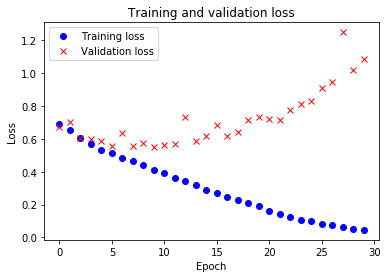

In [52]:
# Loss plots
plt.figure()

plt.plot(epoch, train_loss, 'bo', label='Training loss')
plt.plot(epoch, val_loss, 'rx', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

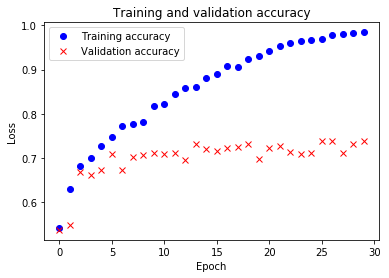

In [53]:
# Accuracy plots
plt.figure()

plt.plot( epoch, train_acc, 'bo', label='Training accuracy' )
plt.plot( epoch, val_acc, 'rx', label='Validation accuracy' )
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()